In [1]:
import torch

import torch.nn as nn

from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim

from train_functions import get_data, train_model, check
from utils import plot_loss
from custom_loss import CustomLoss

from DenseNet_UNet import DenseNet_UNet

In [2]:
H, W = 128, 128
BATCH_SIZE = 64
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


train_transf = transforms.Compose([transforms.RandomRotation(degrees=5),
    transforms.RandomCrop(480), 
    transforms.ColorJitter(brightness = [0.8,1.2]),
    transforms.Resize((H, W)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

test_transf = transforms.Compose([transforms.Resize((H, W)),
                             transforms.ToTensor()])

train_dataset, test_dataset = get_data(reduced=True, train_transformation=train_transf, test_transformation=test_transf)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


print("The device is: ", DEVICE)
print("Number of train images: ", len(train_dataset))
print("Number of test images: ", len(test_dataset))
print("Image shape:", train_dataset[0][0].shape)
print("Mask shape:", train_dataset[0][1].shape)

The device is:  cuda
Number of train images:  1111
Number of test images:  338
Image shape: torch.Size([3, 128, 128])
Mask shape: torch.Size([1, 128, 128])


In [3]:
model = DenseNet_UNet()

criterion = nn.L1Loss()
scores = [criterion, nn.MSELoss()]
optimizer = optim.Adam(model.parameters())

num_epochs = 50

In [4]:
# model.to(DEVICE)

# checkpoint = torch.load('./checkpoints/DenseNet_UNet/epoch_0.pth', map_location=torch.device('cuda'))

# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# train_loss = checkpoint['train_loss']
# test_loss = checkpoint['test_loss']
# optimizer.param_groups[0]['capturable'] = True

# del checkpoint

In [5]:
trained_model, predictions, train_loss, test_loss = train_model(model, train_loader, 
                                                               test_loader, num_epochs, DEVICE, criterion, scores, optimizer, 
                                                               start_epoch=0)#, train_loss=train_loss, test_loss=test_loss)

Batch [1/18], Loss: 0.6363
Batch [2/18], Loss: 0.5495
Batch [3/18], Loss: 0.6762
Batch [4/18], Loss: 0.3194
Batch [5/18], Loss: 0.2486
Batch [6/18], Loss: 0.2317
Batch [7/18], Loss: 0.1881
Batch [8/18], Loss: 0.1804
Batch [9/18], Loss: 0.1506
Batch [10/18], Loss: 0.1353
Batch [11/18], Loss: 0.1341
Batch [12/18], Loss: 0.1417
Batch [13/18], Loss: 0.1426
Batch [14/18], Loss: 0.1396
Batch [15/18], Loss: 0.1441
Batch [16/18], Loss: 0.1493
Batch [17/18], Loss: 0.1636
Batch [18/18], Loss: 0.1371
Epoch [1/50], Train Loss: 0.2482
Test Loss: L1Loss(): 0.2964; MSELoss(): 0.7313
Batch [1/18], Loss: 0.1276
Batch [2/18], Loss: 0.1268
Batch [3/18], Loss: 0.1379
Batch [4/18], Loss: 0.1809
Batch [5/18], Loss: 0.1467
Batch [6/18], Loss: 0.1382
Batch [7/18], Loss: 0.1695
Batch [8/18], Loss: 0.1425
Batch [9/18], Loss: 0.1140
Batch [10/18], Loss: 0.1424
Batch [11/18], Loss: 0.1348
Batch [12/18], Loss: 0.1159
Batch [13/18], Loss: 0.1397
Batch [14/18], Loss: 0.1259
Batch [15/18], Loss: 0.1274
Batch [16/18],

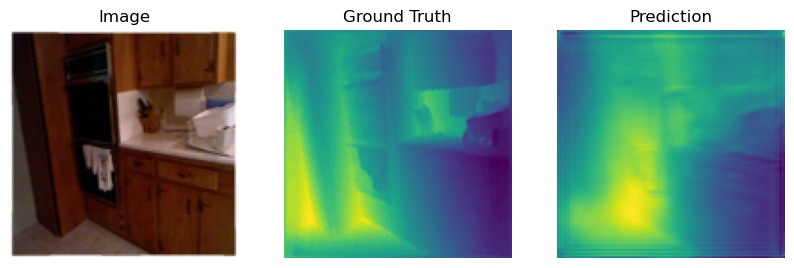

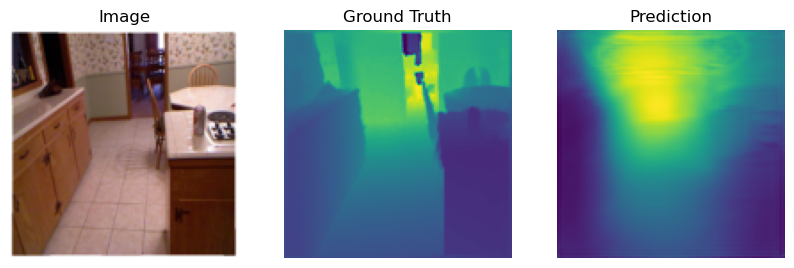

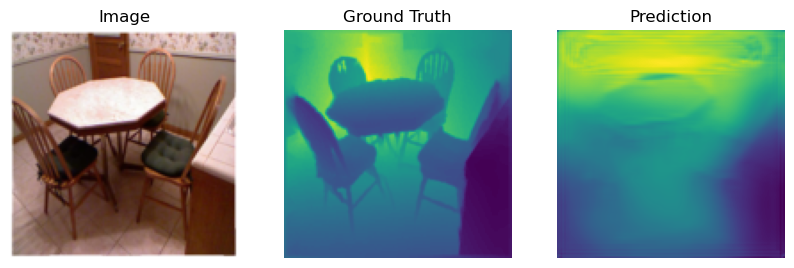

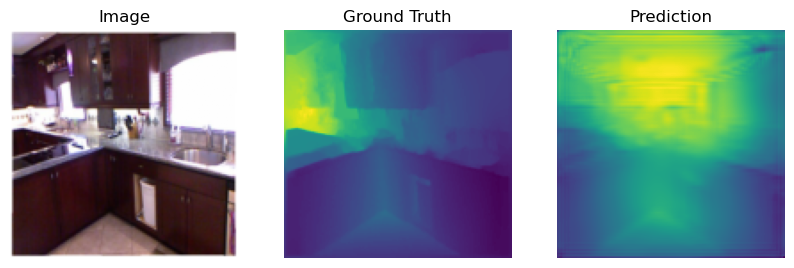

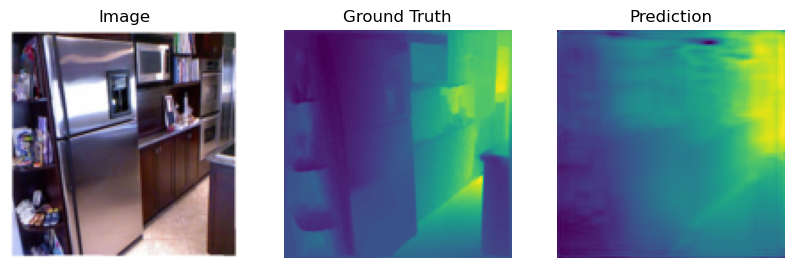

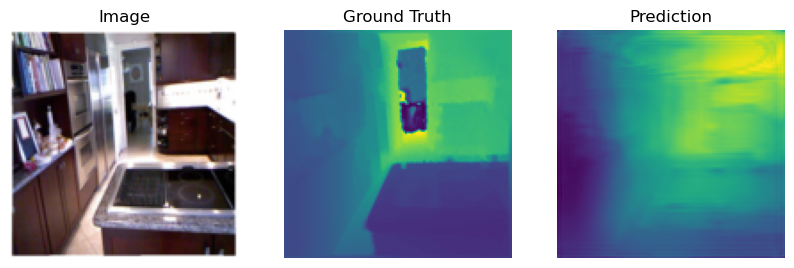

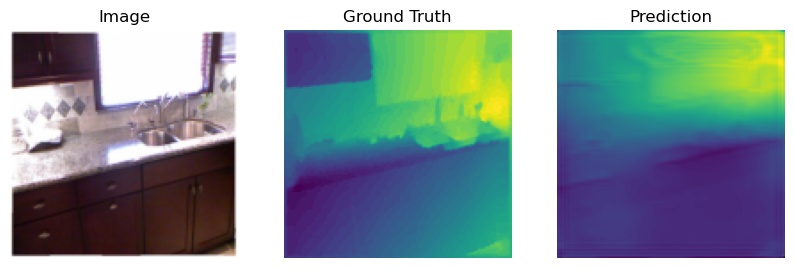

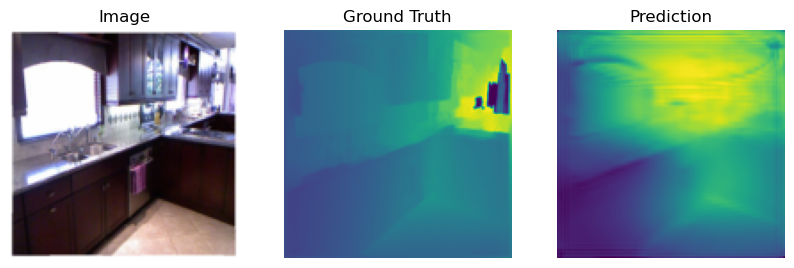

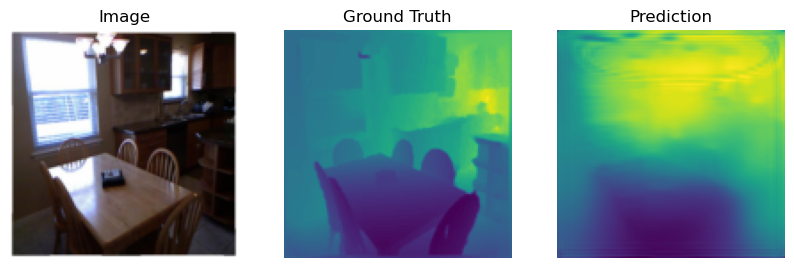

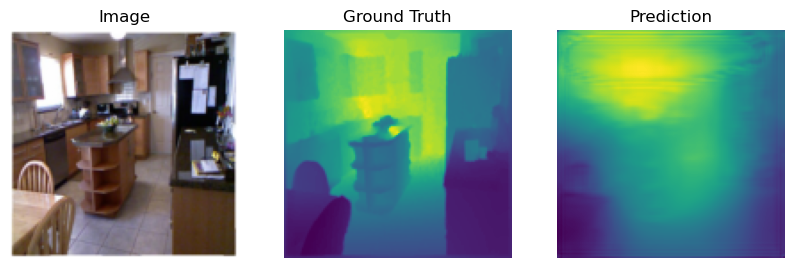

In [7]:
for i in range(10):
    image, mask  = test_dataset[i][0], test_dataset[i][1]
    prediction = predictions[i]
    check(image, mask, prediction)

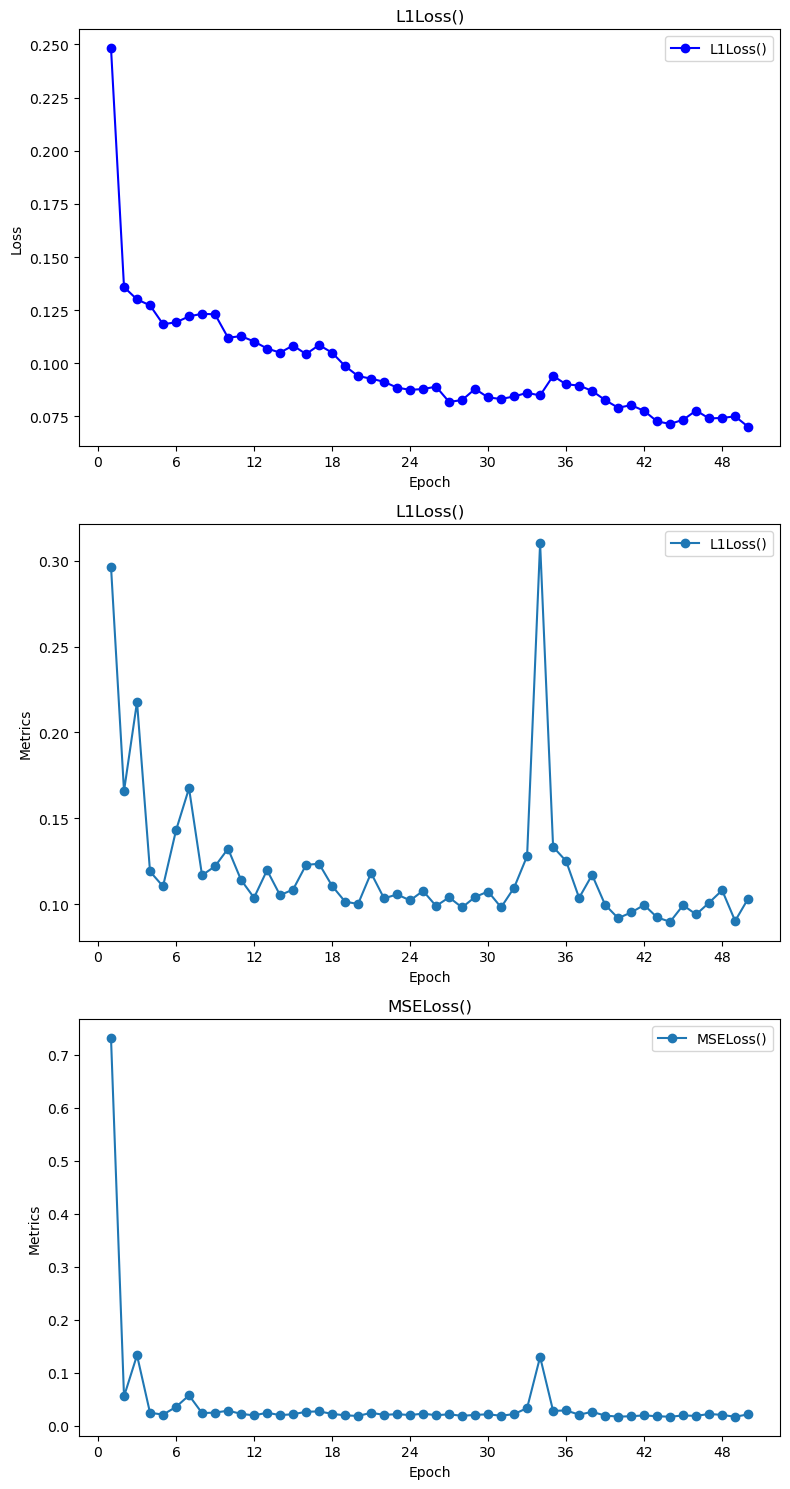

In [8]:
plot_loss(train_loss, test_loss, scores)

In [3]:
model = DenseNet_UNet()

criterion = nn.L1Loss()
scores = [criterion, nn.MSELoss()]
optimizer = optim.Adam(model.parameters())

num_epochs = 100

In [4]:
model.to(DEVICE)

checkpoint = torch.load('./checkpoints/DenseNet_UNet/epoch_50.pth', map_location=torch.device('cuda'))

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
train_loss = checkpoint['train_loss']
test_loss = checkpoint['test_loss']
optimizer.param_groups[0]['capturable'] = True

del checkpoint

In [5]:
trained_model, predictions, train_loss, test_loss = train_model(model, train_loader, 
                                                               test_loader, num_epochs, DEVICE, criterion, scores, optimizer, 
                                                               start_epoch=50, train_loss=train_loss, test_loss=test_loss)

Batch [1/18], Loss: 0.0664
Batch [2/18], Loss: 0.0672
Batch [3/18], Loss: 0.0750
Batch [4/18], Loss: 0.0751
Batch [5/18], Loss: 0.0772
Batch [6/18], Loss: 0.0692
Batch [7/18], Loss: 0.0782
Batch [8/18], Loss: 0.0743
Batch [9/18], Loss: 0.0739
Batch [10/18], Loss: 0.0633
Batch [11/18], Loss: 0.0690
Batch [12/18], Loss: 0.0697
Batch [13/18], Loss: 0.0766
Batch [14/18], Loss: 0.0666
Batch [15/18], Loss: 0.0717
Batch [16/18], Loss: 0.0756
Batch [17/18], Loss: 0.0779
Batch [18/18], Loss: 0.0743
Epoch [51/100], Train Loss: 0.0723
Test Loss: L1Loss(): 0.0967; MSELoss(): 0.0189
Batch [1/18], Loss: 0.0687
Batch [2/18], Loss: 0.0748
Batch [3/18], Loss: 0.0768
Batch [4/18], Loss: 0.0608
Batch [5/18], Loss: 0.0704
Batch [6/18], Loss: 0.0722
Batch [7/18], Loss: 0.0795
Batch [8/18], Loss: 0.0792
Batch [9/18], Loss: 0.0731
Batch [10/18], Loss: 0.0822
Batch [11/18], Loss: 0.0747
Batch [12/18], Loss: 0.0658
Batch [13/18], Loss: 0.0670
Batch [14/18], Loss: 0.0671
Batch [15/18], Loss: 0.0769
Batch [16/18

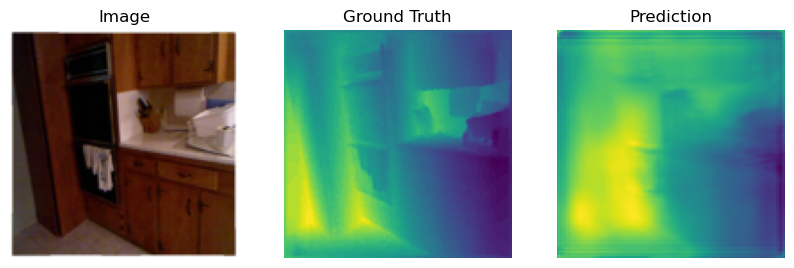

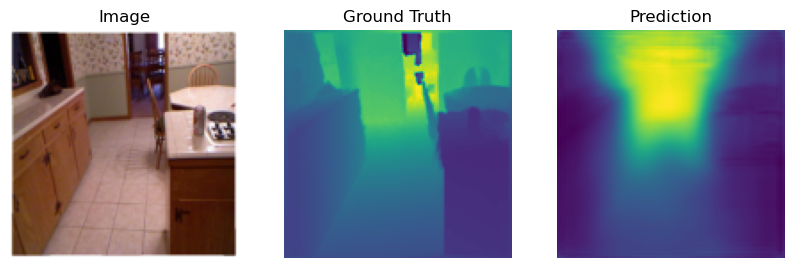

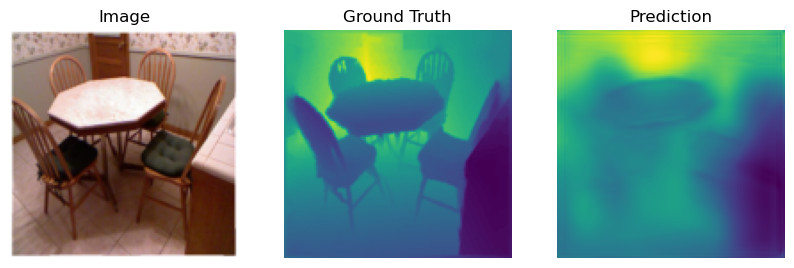

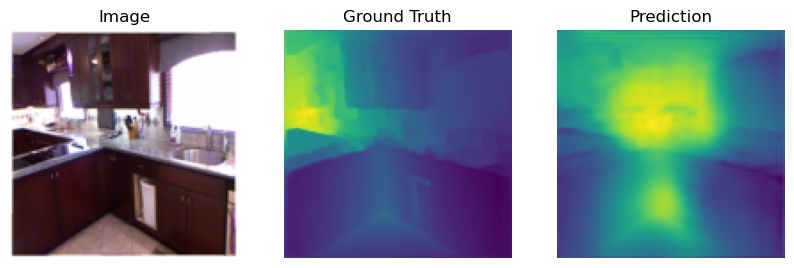

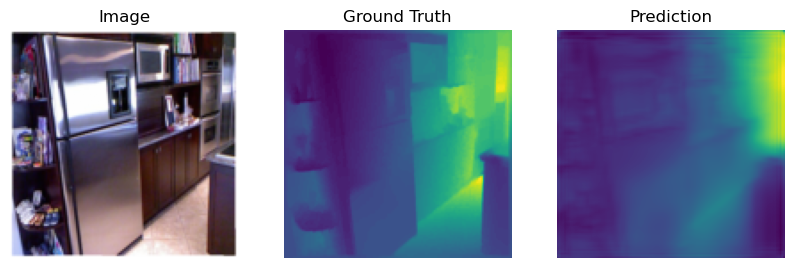

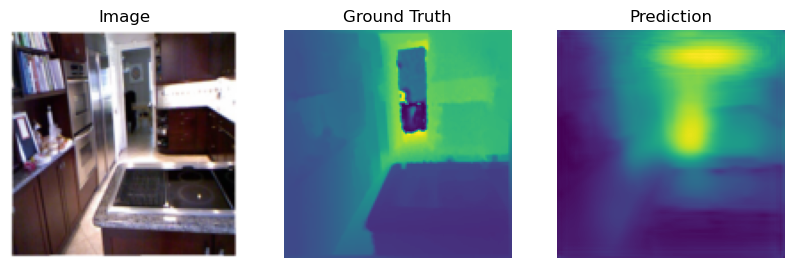

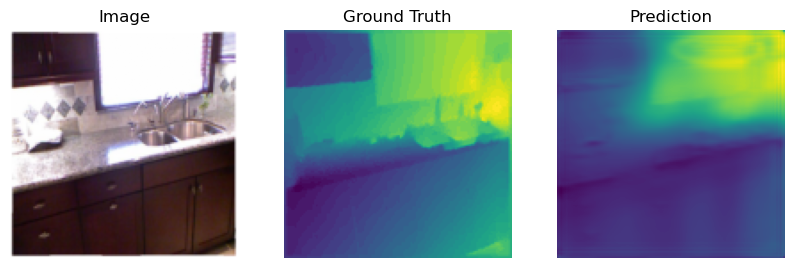

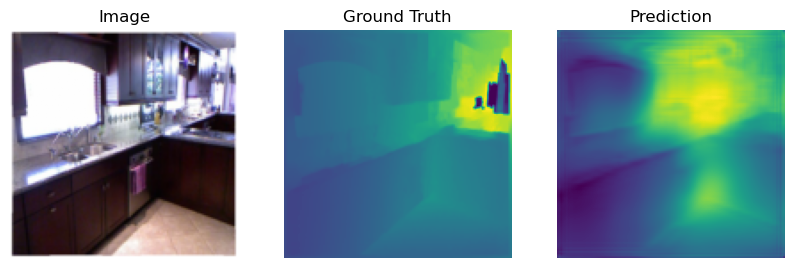

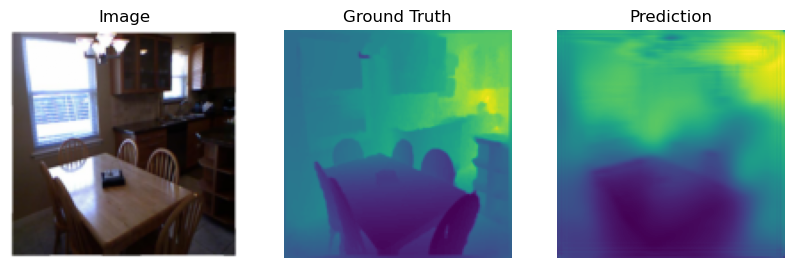

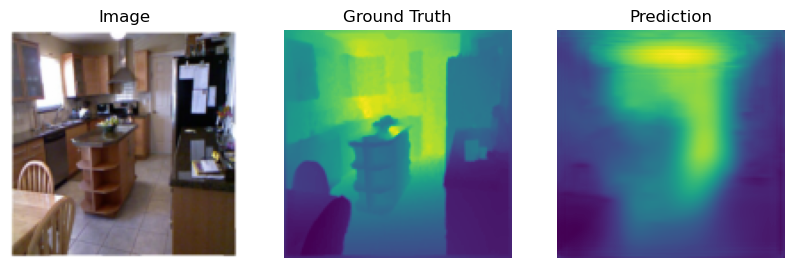

In [6]:
for i in range(10):
    image, mask  = test_dataset[i][0], test_dataset[i][1]
    prediction = predictions[i]
    check(image, mask, prediction)

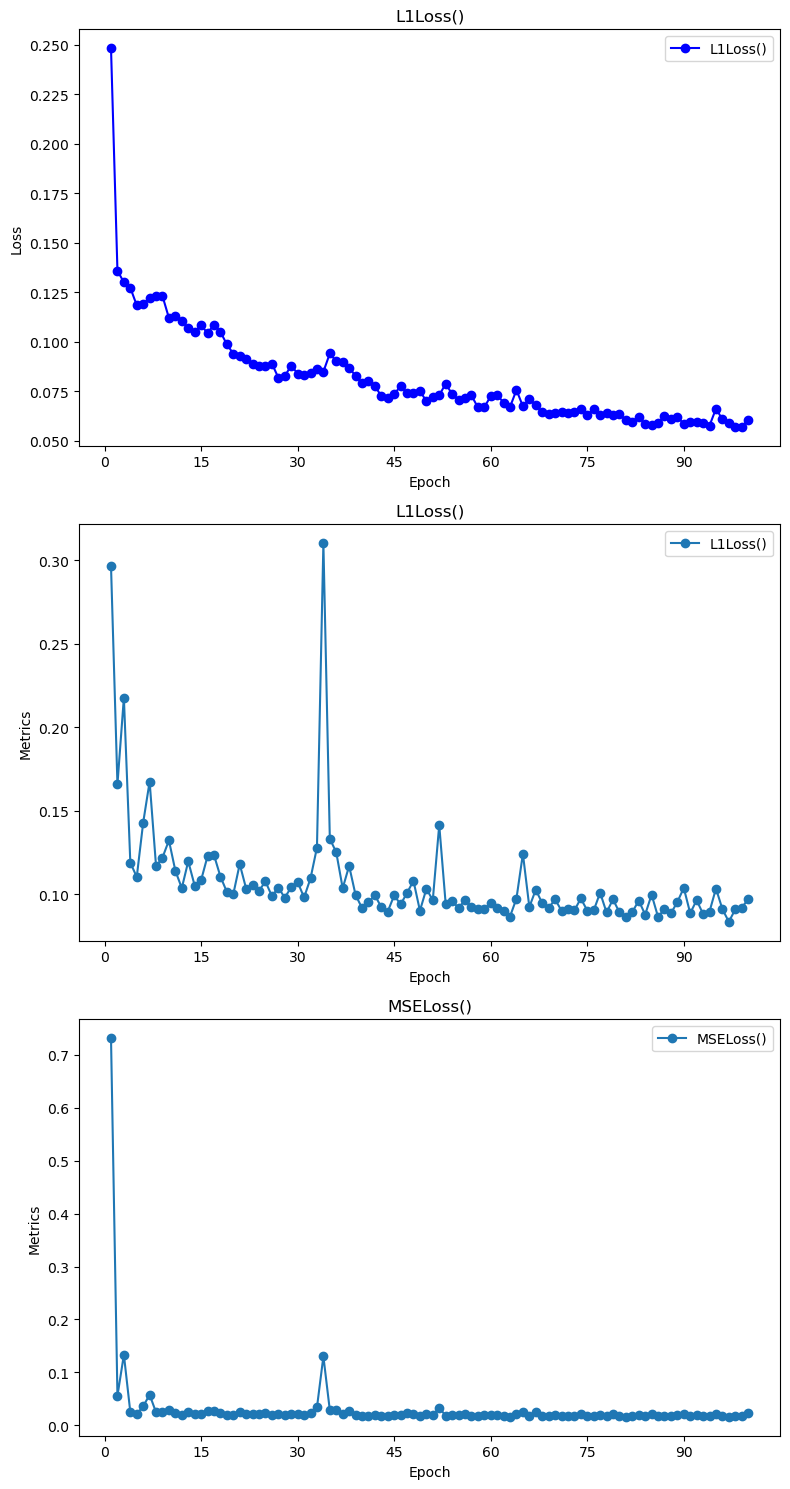

In [7]:
plot_loss(train_loss, test_loss, scores)